# Draft analysis 

---

Group name:

---


## Introduction

*This section includes an introduction to the project motivation, data, and research question. Include a data dictionary* 

## Setup

In [337]:
#Import all necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

import pickle
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Data

## Import data

In [338]:
# import Data into Pandas Frame
df = pd.read_csv("../data/interim/TransformedData",delimiter=",", index_col=0)

In [339]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


### Data structure

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(175), int64(13), object(7)
memory usage: 12.5+ MB


### Data corrections

In [341]:
cat_vars = [
    "gender", 
    "condtn",
    "match",
    "samerace",
    "age_o",
    "race_o",
    "dec_o",
    "met_o",
    "field_cd",
    "race",
    "zipcode",
    "goal",
    "date",
    "go_out",
    "career_c",
    "dec",
    "met",
    "length",
    "numdat_2",
    "date_3",
]

float_vars = [
    "int_corr",
    "pf_o_att",
    "pf_o_sin",
    "pf_o_int",
    "pf_o_fun",
    "pf_o_amb",
    "pf_o_sha",
    "income",
    "attr1_1",
    "sinc1_1",
    "intel1_1",
    "fun1_1",
    "amb1_1",
    "shar1_1",
    "attr4_1",
    "sinc4_1",
    "intel4_1",
    "fun4_1",
    "amb4_1",
    "shar4_1",
    "attr2_1",
    "sinc2_1",
    "intel2_1",
    "fun2_1",
    "amb2_1",
    "shar2_1"
]

int_vars = [
    "attr_o",
    "sinc_o",
    "intel_o",
    "fun_o",
    "amb_o",
    "shar_o",
    "like_o",
    "prob_o",
    "age",
    "imprace",
    "imprelig",
    "sports",
    "tvsports",
    "excersice",
    "dining",
    "museums",
    "art",
    "hiking",
    "gaming",
    "clubbing",
    "reading",
    "tv",
    "theater",
    "movies",
    "concerts",
    "music",
    "shopping",
    "yoga",
    "exhappy",
    "attr3_1",
    "sinc3_1",
    "intel3_1",
    "fun3_1",
    "amb3_1",
    "attr5_1",
    "sinc5_1",
    "intel5_1",
    "fun5_1",
    "amb5_1",
    "attr",
    "sinc",
    "intel",
    "fun",
    "amb",
    "shar",
    "like",
    "prob",
    "attr1_s",
    "sinc1_s",
    "intel1_s",
    "fun1_s",
    "amb1_s",
    "shar1_s",
    "attr4_s",
    "sinc4_s",
    "intel4_s",
    "fun4_s",
    "amb4_s",
    "satis_2",
    "iid",
    "id",
    "idg",
    "wave",
    "round",
    "order",
    "partner",
    "pid",
    "expnum",
    "you_call",
    "them_cal",
    "numdat_3",
    "num_in_3",
    "position",
    "positin1",
]

str_vars = [
    "field",
    "from",
    "career"
]

unused_vars = [
    "undergrd",
    "mn_sat",
    "tuition"
]

In [342]:
df[cat_vars]=df[cat_vars].astype("category",copy=False)
df[float_vars]=df[float_vars].astype("float",copy=False)
df[str_vars]=df[str_vars].astype("str",copy=False)

In [343]:
df.rename(columns={"amb":"Ambitionsness","attr":"Attractiveness","sinc":"Sincerity","fun":"Funniness","intel":"Intelligence","shar":"Percieved shared interests","int_corr":"Correlation of interests"},inplace=True)

In [344]:
variables = ['Attractiveness', 'Sincerity', 'Intelligence', 'Funniness', 'Ambitionsness', 'Percieved shared interests', 'prob','like']
df = df[variables]

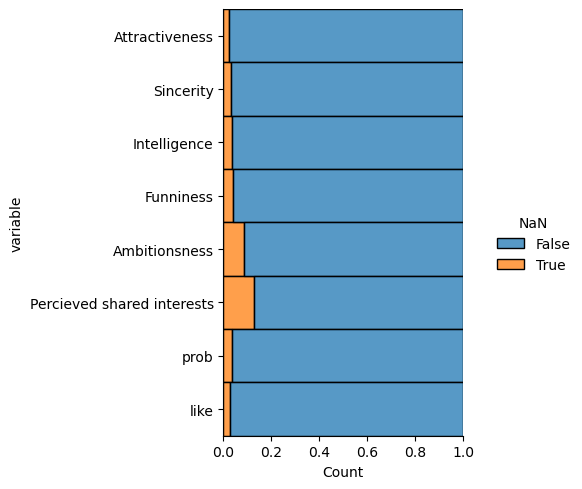

In [345]:
g=sns.displot(
    data=df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill",
)

Drop NAs

In [346]:
df.isna().sum()

Attractiveness                 202
Sincerity                      277
Intelligence                   296
Funniness                      350
Ambitionsness                  712
Percieved shared interests    1067
prob                           309
like                           240
dtype: int64

In [347]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

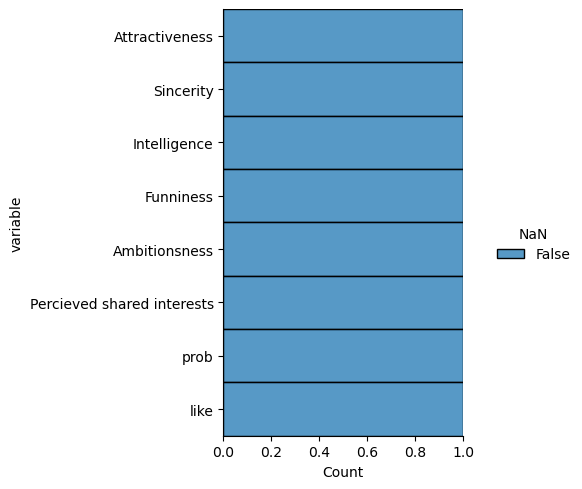

In [348]:
g=sns.displot(
    data=df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill",
)

### Variable lists

In [349]:
y_label = variables.pop()
features = variables

X = df[features]
y = df[y_label]

In [350]:
y_label

'like'

In [351]:
features

['Attractiveness',
 'Sincerity',
 'Intelligence',
 'Funniness',
 'Ambitionsness',
 'Percieved shared interests',
 'prob']

### Data splitting

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42)

## Analysis

### Descriptive statistics

In [353]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Attractiveness,6963.0,6.192360,1.947634,0.0,5.0,6.0,8.0,10.0
Sincerity,6963.0,7.163004,1.741066,0.0,6.0,7.0,8.0,10.0
Intelligence,6963.0,7.357748,1.556295,0.0,6.0,7.0,8.0,10.0
Funniness,6963.0,6.395376,1.954875,0.0,5.0,7.0,8.0,10.0
Ambitionsness,6963.0,6.758940,1.793595,0.0,6.0,7.0,8.0,10.0
Percieved shared interests,6963.0,5.457633,2.144922,0.0,4.0,6.0,7.0,10.0
prob,6963.0,5.252836,2.142212,0.0,4.0,5.0,7.0,10.0
like,6963.0,6.130360,1.847802,0.0,5.0,6.0,7.0,10.0


### Exploratory data analysis

In [354]:
alt.Chart(df).mark_bar().encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=True),
    y='count()',
).properties(
    width=150,
    height=150
).repeat(
    column=features
)

c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.RepeatChart(...)

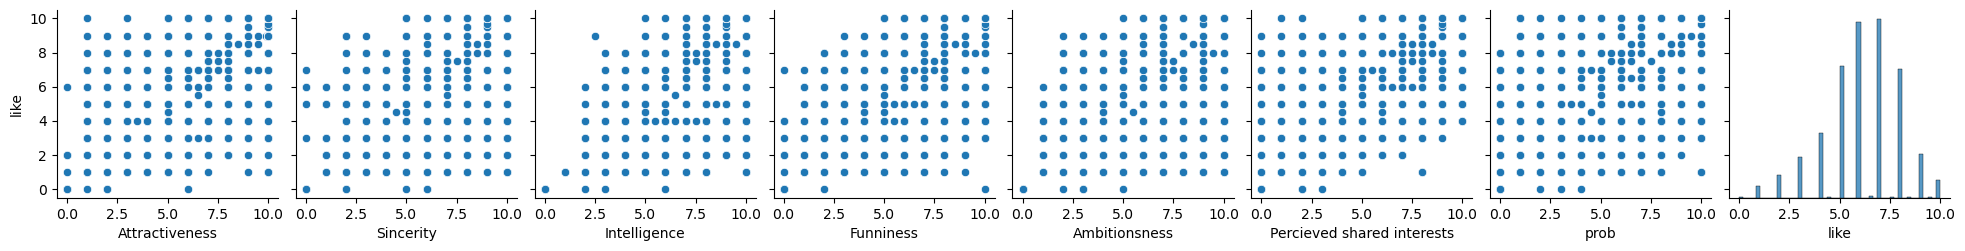

In [355]:
sns.pairplot(df, y_vars='like')

<AxesSubplot: >

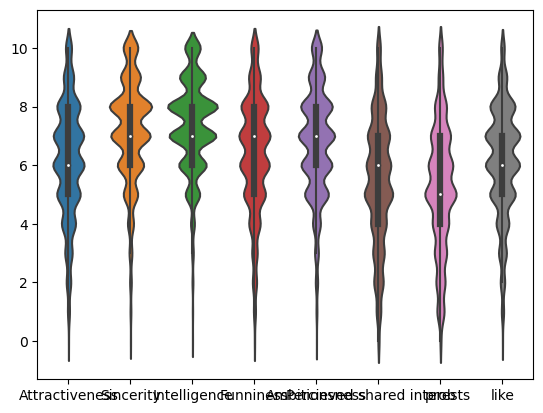

In [356]:
sns.violinplot(df)

<AxesSubplot: >

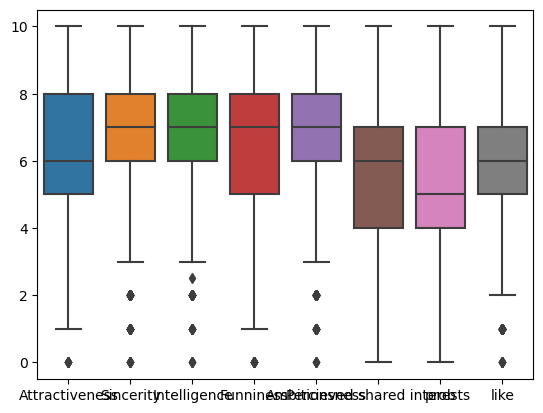

In [357]:
sns.boxplot(df)

### Relationships

In [358]:
# inspect correlation between outcome and possible predictors
corr = df.corr()
corr['like'].sort_values(ascending=False)

like                          1.000000
Funniness                     0.689726
Attractiveness                0.667723
Percieved shared interests    0.660098
Sincerity                     0.520797
Intelligence                  0.506232
prob                          0.482469
Ambitionsness                 0.444707
Name: like, dtype: float64

In [359]:
corr.style.background_gradient(cmap='Blues')

,Attractiveness,Sincerity,Intelligence,Funniness,Ambitionsness,Percieved shared interests,prob,like
Attractiveness,1.000000,0.404222,0.383888,0.589231,0.354461,0.486769,0.277206,0.667723
Sincerity,0.404222,1.000000,0.665593,0.507224,0.462317,0.397207,0.332566,0.520797
Intelligence,0.383888,0.665593,1.000000,0.498910,0.627679,0.401485,0.280665,0.506232
Funniness,0.589231,0.507224,0.498910,1.000000,0.492723,0.615875,0.390512,0.689726
Ambitionsness,0.354461,0.462317,0.627679,0.492723,1.000000,0.431798,0.280203,0.444707
Percieved shared interests,0.486769,0.397207,0.401485,0.615875,0.431798,1.000000,0.474377,0.660098
prob,0.277206,0.332566,0.280665,0.390512,0.280203,0.474377,1.000000,0.482469
like,0.667723,0.520797,0.506232,0.689726,0.444707,0.660098,0.482469,1.000000


## Model Regression

### Select model

In [360]:
# select the linear regression model
reg = LinearRegression()


### Training and validation Regression

In [361]:
scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error') *-1
# store cross-validation scores
df_scores = pd.DataFrame({"lr": scores})

# reset index to match the number of folds
df_scores.index += 1

# print dataframe
df_scores.style.background_gradient(cmap='Blues')

,lr
1,1.119776
2,1.143680
3,1.062097
4,1.132503
5,1.148116


In [362]:
alt.Chart(df_scores.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y("lr", aggregate="mean", title="Mean squared error (MSE)")
)

c:\Users\Sscho\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [363]:
df_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
lr,5.0,1.121234,0.034831,1.062097,1.119776,1.132503,1.14368,1.148116


### Fit model

In [364]:
# Fit the model to the data
reg.fit(X_train, y_train)

LinearRegression()

In [365]:
# intercept
intercept = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":[reg.intercept_]}
    )

# make a slope table
slope = pd.DataFrame({
    "Name": features,
    "Coefficient": reg.coef_}
)

# combine estimates of intercept and slopes
table = pd.concat([intercept, slope], ignore_index=True, sort=False)

round(table, 3)

,Name,Coefficient
0,Intercept,-0.225
1,Attractiveness,0.298
2,Sincerity,0.089
3,Intelligence,0.116
4,Funniness,0.208
5,Ambitionsness,-0.011
6,Percieved shared interests,0.203
7,prob,0.126


### Evaluation on test set

In [366]:
# obtain predictions
y_pred = reg.predict(X_test)

In [367]:
print(mean_absolute_error(y_test, y_pred).round(3))
mean_squared_error(y_test, y_pred, squared=False).round(3)
mean_squared_error(y_test, y_pred).round(3)
r2_score(y_test, y_pred).round(3)

0.789


0.692

In [368]:
importance = np.abs(reg.coef_)

df_imp = pd.DataFrame({"coeff": importance, 
                       "name": features,"reg":"MultiLinear"})
df_imp

,coeff,name,reg
0,0.297618,Attractiveness,MultiLinear
1,0.088812,Sincerity,MultiLinear
2,0.115724,Intelligence,MultiLinear
3,0.208068,Funniness,MultiLinear
4,0.010838,Ambitionsness,MultiLinear
5,0.202783,Percieved shared interests,MultiLinear
6,0.125550,prob,MultiLinear


### Save model



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

In [369]:
folder = '../models/'
pkl_filename = 'clf_reg_20221222.pkl'

In [370]:
with open(folder + pkl_filename, 'wb') as file:
    pickle.dump(reg, file)

In [371]:
with open(folder + pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

pickle_model

LinearRegression()

## Conclusions

# Model Lasso


In [372]:
lasso = LassoCV(cv=5,random_state=0,max_iter=15000)
lasso.fit(X_train,y_train)

LassoCV(cv=5, max_iter=15000, random_state=0)

In [373]:
lasso.alpha_

0.018149939617142067

In [374]:
# Set best alpha
lasso_best = Lasso(alpha=lasso.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.018149939617142067)

In [375]:
print(list(zip(lasso_best.coef_, X)))

[(0.29531837670826594, 'Attractiveness'), (0.08742533932183187, 'Sincerity'), (0.10516815372316611, 'Intelligence'), (0.20629329491809506, 'Funniness'), (-0.0, 'Ambitionsness'), (0.20140741500773204, 'Percieved shared interests'), (0.12330883780603494, 'prob')]


In [376]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 66.93
R squared test set 69.22


In [377]:
mean_squared_error(y_test, lasso_best.predict(X_test))

1.087658587308554

In [378]:
importance = np.abs(lasso_best.coef_)

df_lasso = pd.DataFrame({"coeff": importance, 
                       "name": features,"reg":"Lasso"})
df_lasso
dfdisplay=pd.concat([df_imp,df_lasso])

(0.001821337108094456,
 3.6340452946352664,
 0.9353675244881134,
 3.7235898586059237)

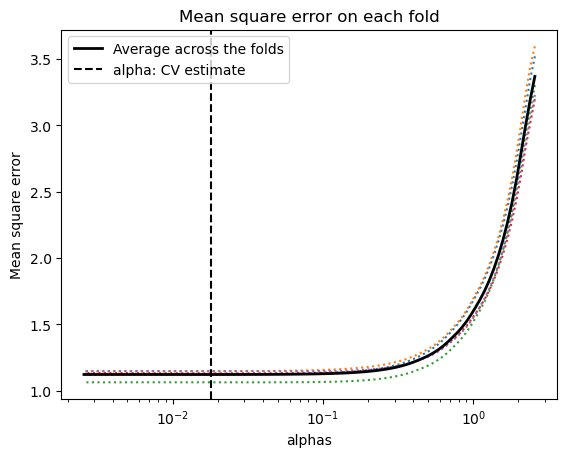

In [379]:
plt.semilogx(lasso.alphas_, lasso.mse_path_, ":")
plt.plot(
    lasso.alphas_ ,
    lasso.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lasso.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")


# Model Comparison

In [380]:
Compdf= pd.DataFrame({"Type":["MAE_Regression","RMSE_Regression","MSE_Regression","R2_Regression","MAE_Lasso","RMSE_Lasso","MSE_Lasso","R2_Lasso"],"Values":[mean_absolute_error(y_test, y_pred).round(3),mean_squared_error(y_test, y_pred, squared=False).round(3),mean_squared_error(y_test, y_pred).round(3),r2_score(y_test, y_pred).round(3),mean_absolute_error(y_test, lasso_best.predict(X_test)).round(3),mean_squared_error(y_test, lasso_best.predict(X_test), squared=False).round(3),mean_squared_error(y_test, lasso_best.predict(X_test)).round(3),r2_score(y_test, lasso_best.predict(X_test)).round(3)]})

In [381]:
Compdf

,Type,Values
0,MAE_Regression,0.789
1,RMSE_Regression,1.042
2,MSE_Regression,1.087
3,R2_Regression,0.692
4,MAE_Lasso,0.790
5,RMSE_Lasso,1.043
6,MSE_Lasso,1.088
7,R2_Lasso,0.692


<AxesSubplot: xlabel='coeff', ylabel='name'>

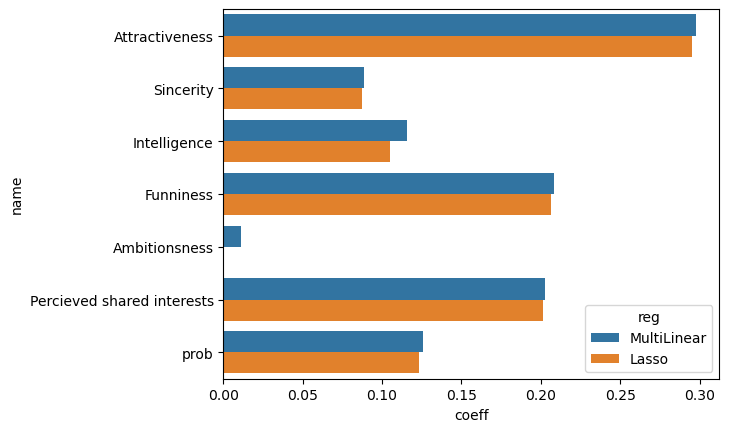

In [382]:
sns.barplot(dfdisplay,y="name",x="coeff",hue="reg")